<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
    </a>
</p>


# Test Environment for Generative AI classroom labs

This lab provides a test environment for the codes generated using the Generative AI classroom.

Follow the instructions below to set up this environment for further use.


# Setup


### Install required libraries

In case of a requirement of installing certain python libraries for use in your task, you may do so as shown below.


In [1]:
%pip install seaborn
import piplite

await piplite.install(['nbformat', 'plotly'])

### Dataset URL from the GenAI lab
Use the URL provided in the GenAI lab in the cell below. 


In [2]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0271EN-SkillsNetwork/labs/v1/m3/data/used_car_price_analysis.csv"

### Downloading the dataset

Execute the following code to download the dataset in to the interface.

> Please note that this step is essential in JupyterLite. If you are using a downloaded version of this notebook and running it on JupyterLabs, then you can skip this step and directly use the URL in pandas.read_csv() function to read the dataset as a dataframe


In [4]:
import pandas as pd
import requests
import io

In [7]:
req = requests.get(URL).content
df = pd.read_csv(io.StringIO(req.decode('utf-8')))

In [8]:
df.head()

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,Fiesta,2017,Automatic,15944,Petrol,150.0,57.7,1.0,12000
1,Focus,2018,Manual,9083,Petrol,150.0,57.7,1.0,14000
2,Focus,2017,Manual,12456,Petrol,150.0,57.7,1.0,13000
3,Fiesta,2019,Manual,10460,Petrol,145.0,40.3,1.5,17500
4,Fiesta,2019,Automatic,1482,Petrol,145.0,48.7,1.0,16500


In [9]:
df.shape

(17966, 9)

In [10]:
# Identify columns with missing values
columns_with_missing_values = df.columns[df.isnull().any()].tolist()
print("Columns with missing values:", columns_with_missing_values)

# Replace missing values with mean value of the column
for col in columns_with_missing_values:
    df[col].fillna(df[col].mean(), inplace=True)

# Delete duplicate entries
df.drop_duplicates(inplace=True)

Columns with missing values: ['tax']


<ipython-input-10-b09a301f408b>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [11]:
df.shape

(17812, 9)

In [13]:
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

# Get the top 5 parameters with highest correlation to 'price'
top_correlated_params = correlation_matrix['price'].sort_values(ascending=False)[1:6]

print("Top 5 parameters with highest correlation to 'price':")
print(top_correlated_params)

Top 5 parameters with highest correlation to 'price':
year          0.635715
engineSize    0.411451
tax           0.405970
mpg          -0.346263
mileage      -0.530483
Name: price, dtype: float64


In [16]:
# Count the number of cars under each unique value of fuelType
car_count_by_fuel_type = df['fuelType'].value_counts()

print("Number of cars under each unique value of fuelType:")
print(car_count_by_fuel_type)

Number of cars under each unique value of fuelType:
fuelType
Petrol      12081
Diesel       5706
Hybrid         22
Electric        2
Other           1
Name: count, dtype: int64


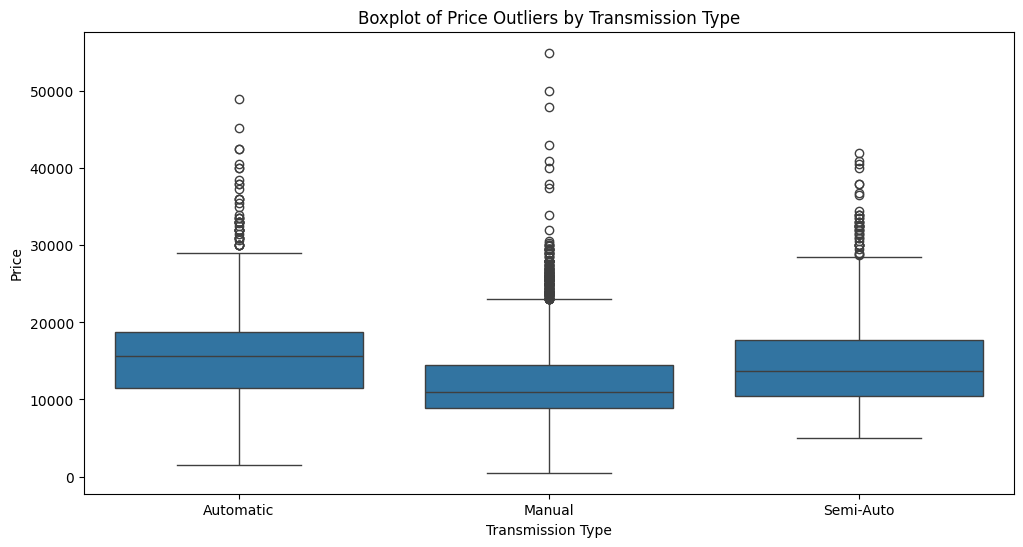

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your data frame with columns = ['model','year','transmission','mileage','fuelType','tax','mpg','engineSize','price']

# Create a boxplot to identify price outliers for each unique transmission type
plt.figure(figsize=(12, 6))
sns.boxplot(x='transmission', y='price', data=df)
plt.title("Boxplot of Price Outliers by Transmission Type")
plt.xlabel("Transmission Type")
plt.ylabel("Price")
plt.show()

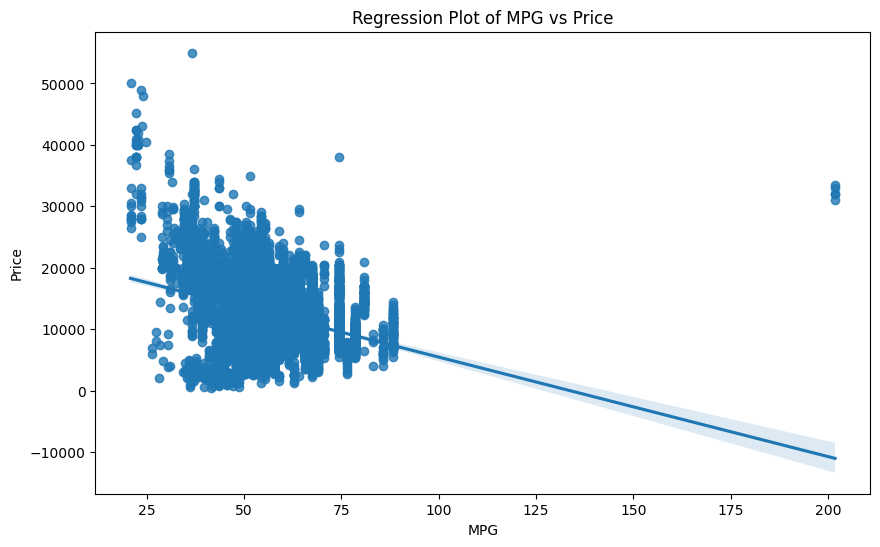

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your data frame with columns = ['model','year','transmission','mileage','fuelType','tax','mpg','engineSize','price']

# Create a regression plot to determine the correlation between 'mpg' and 'price'
plt.figure(figsize=(10, 6))
sns.regplot(x='mpg', y='price', data=df)
plt.title("Regression Plot of MPG vs Price")
plt.xlabel("MPG")
plt.ylabel("Price")
plt.show()

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Assuming df is your data frame with columns = ['model','year','transmission','mileage','fuelType','tax','mpg','engineSize','price']

# Selecting the feature 'mpg' for prediction
X = df[['mpg']]
y = df['price']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and fitting the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Calculating R^2 score and Mean Squared Error
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R^2 Score:", r2)
print("Mean Squared Error:", mse)

R^2 Score: 0.1504343741072478
Mean Squared Error: 19049855.140110757


In [20]:
# Selecting the features for prediction
X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y = df['price']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and fitting the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Calculating R^2 score and Mean Squared Error
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R^2 Score:", r2)
print("Mean Squared Error:", mse)

R^2 Score: 0.6917125923771564
Mean Squared Error: 6912744.910746688


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Assuming df is your data frame with columns = ['model','year','transmission','mileage','fuelType','tax','mpg','engineSize','price']

# Selecting the features for prediction
X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y = df['price']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a pipeline model
model = Pipeline([
    ('scaler', StandardScaler()),
    ('poly_features', PolynomialFeatures(degree=2)),
    ('linear_regression', LinearRegression())
])

# Fitting the pipeline model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Calculating R^2 score and Mean Squared Error
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R^2 Score:", r2)
print("Mean Squared Error:", mse)

R^2 Score: 0.12122807147174242
Mean Squared Error: 19704749.61491952


In [23]:
from sklearn.linear_model import Ridge

# Selecting the features for prediction
X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y = df['price']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and fitting the Ridge regression model
model = Ridge(alpha=0.1)
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Calculating R^2 score
r2 = r2_score(y_test, y_pred)

print("R^2 Score for Ridge Regression:", r2)

R^2 Score for Ridge Regression: 0.6917134446113138


In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error

# Assuming df is your data frame with columns = ['model','year','transmission','mileage','fuelType','tax','mpg','engineSize','price']

# Selecting the features for prediction
X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y = df['price']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Performing polynomial transform on X and Y data
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

y_train_transformed = np.log1p(y_train)
y_test_transformed = np.log1p(y_test)

# Creating and fitting the Ridge regression model
model = Ridge(alpha=0.1)
model.fit(X_train_poly, y_train_transformed)

# Making predictions
y_pred = model.predict(X_test_poly)

# Calculating R^2 score and Mean Squared Error
r2 = r2_score(y_test_transformed, y_pred)
mse = mean_squared_error(y_test_transformed, y_pred)

print("R^2 Score for Ridge Regression with Polynomial Features and Transformed Target:", r2)
print("Mean Squared Error for Ridge Regression with Polynomial Features and Transformed Target:", mse)

/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.17676e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


R^2 Score for Ridge Regression with Polynomial Features and Transformed Target: 0.6795036446239094
Mean Squared Error for Ridge Regression with Polynomial Features and Transformed Target: 0.05011498598981352


In [28]:
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error

# Assuming df is your data frame with columns = ['year', 'mileage', 'tax', 'mpg', 'engineSize', 'price']

# Selecting the features for prediction
X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y = df['price']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Performing polynomial transform on X and Y data
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

y_train_transformed = np.log1p(y_train)
y_test_transformed = np.log1p(y_test)

# Setting up the Ridge regression model
ridge = Ridge()
parameters = {'alpha': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(ridge, parameters, cv=KFold(n_splits=4, shuffle=True, random_state=42))

# Fitting the model with Grid Search
grid_search.fit(X_train_poly, y_train_transformed)

# Getting the best alpha value
best_alpha = grid_search.best_params_['alpha']
print("Optimum Alpha Value:", best_alpha)

/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.79952e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.86465e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.85477e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=3.1095e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.79952e-24): resu

Optimum Alpha Value: 100


---


# Test Environment


## Authors


[Abhishek Gagneja](https://www.linkedin.com/in/abhishek-gagneja-23051987/)


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-12-10|0.1|Abhishek Gagneja|Initial Draft created|


Copyright © 2023 IBM Corporation. All rights reserved.
